Mathew Lhotak

In [1]:
## Research question/interests
#I'm interested in looking at certain factors that might influence the outcome of chess games. That is, looking at variables like opening moves, strategies, number of moves in each game.
#Conducting an analysis on these variables might provide useful insight for chess players deciding what they might do to help them win games.


In [10]:
import pandas as pd
import numpy as np

In [13]:
pd.read_csv("chess_games.csv")
rawdf=pd.read_csv("chess_games.csv")
rawdf.head()
rawdf.columns

Index(['game_id', 'rated', 'turns', 'victory_status', 'winner',
       'time_increment', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_code', 'opening_moves',
       'opening_fullname', 'opening_shortname', 'opening_response',
       'opening_variation'],
      dtype='object')

In [ ]:
#Here, I'm interested in looking at types of opening strategies and the outcomes. So, I'll create a new proccessed data set with column of match outcome and opening_shortname

In [14]:
dfcleaned= rawdf[['victory_status', 'opening_shortname']]

In [15]:
dfcleaned

,victory_status,opening_shortname
0,Out of Time,Slav Defense
1,Resign,Nimzowitsch Defense
2,Mate,King's Pawn Game
3,Mate,Queen's Pawn Game
4,Mate,Philidor Defense
...,...,...
20053,Resign,Dutch Defense
20054,Mate,Queen's Pawn
20055,Mate,Queen's Pawn Game
20056,Resign,Pirc Defense


In [17]:
mate= ['Mate']

In [18]:
wongames= dfcleaned[dfcleaned['victory_status'].isin(mate)]

In [19]:
wongames

,victory_status,opening_shortname
2,Mate,King's Pawn Game
3,Mate,Queen's Pawn Game
4,Mate,Philidor Defense
9,Mate,Scandinavian Defense
10,Mate,Van't Kruijs Opening
...,...,...
20049,Mate,French Defense
20051,Mate,French Defense
20054,Mate,Queen's Pawn
20055,Mate,Queen's Pawn Game


In [20]:
for col in wongames:
    print(wongames['victory_status'].unique())
    
    

['Mate']
['Mate']


In [21]:
wongames['opening_shortname'].value_counts()

Sicilian Defense      721
French Defense        428
Queen's Pawn Game     421
King's Pawn Game      376
Italian Game          309
                     ... 
Australian Defense      1
System                  1
Wade Defense            1
Doery Defense           1
Barnes Opening          1
Name: opening_shortname, Length: 120, dtype: int64

In [22]:
wongames['opening_shortname'].describe()

count                 6325
unique                 120
top       Sicilian Defense
freq                   721
Name: opening_shortname, dtype: object

In [24]:
# I'm interested in, for example, the top 10 strategies that had the highest win count.
dfwongames=wongames['opening_shortname'].value_counts().to_frame()

<AxesSubplot:>

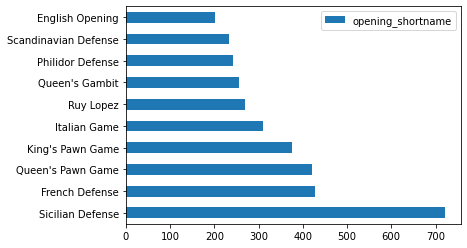

In [25]:
dfwongames[:10].plot(kind='barh')

<AxesSubplot:>

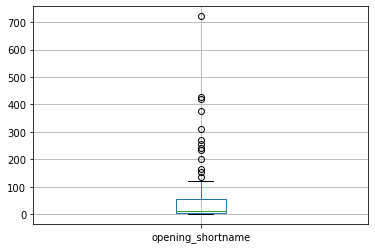

In [29]:
#As we can see in the visualization above, we can see that the Sicilian Defense strategy had the most wins that resulted in a check mate victory.
#
dfwongames.boxplot('opening_shortname')

In [36]:
#On the boxplot above, we can also see that within the top 10 strategies that had the highest win rate, most are grouped together within a 100-450 wins interval. While the Sicilian Defense is almost an
#outlier here. Is there a chance that there's a reason that it's an outlier? 
#Lets recall the dfcleaned dataframe and see how many times each strategy was used

In [32]:
dfcleaned['opening_shortname'].value_counts()

Sicilian Defense       2632
French Defense         1412
Queen's Pawn Game      1233
Italian Game            981
King's Pawn Game        917
                       ... 
Valencia Opening          1
Australian Defense        1
Doery Defense             1
Pterodactyl Defense       1
Global Opening            1
Name: opening_shortname, Length: 128, dtype: int64

In [35]:
#Clearly, we see that Sicilian Defense was used the most. This could explain why it's acting as an outlier in the visuals above. This can be caused by an omitted variable bias.

In [37]:
#To find out the win rate of each strategy used, we can simply divide the number of games that each strategy was deployed by how many games were won by each of the strategies.
#Because of simplicity and accuracy, We will calculate the strategies that were used more often, i.e., a larger sample size, so that we it can be more accurate.

In [39]:
dfcleaned['opening_shortname'].value_counts()[:30]

Sicilian Defense         2632
French Defense           1412
Queen's Pawn Game        1233
Italian Game              981
King's Pawn Game          917
Queen's Gambit            912
Ruy Lopez                 858
English Opening           720
Scandinavian Defense      716
Philidor Defense          691
Caro-Kann Defense         597
Scotch Game               465
Four Knights Game         370
Van't Kruijs Opening      368
Zukertort Opening         336
Bishop's Opening          323
Indian Game               319
Pirc Defense              288
Russian Game              252
Slav Defense              240
King's Gambit             237
Modern Defense            225
Nimzowitsch Defense       224
Horwitz Defense           209
King's Indian Defense     197
Alekhine Defense          192
King's Knight Opening     183
Hungarian Opening         179
Center Game               172
Owen Defense              171
Name: opening_shortname, dtype: int64

In [43]:
wongames['opening_shortname'].value_counts()[:30]

Sicilian Defense         721
French Defense           428
Queen's Pawn Game        421
King's Pawn Game         376
Italian Game             309
Ruy Lopez                269
Queen's Gambit           255
Philidor Defense         243
Scandinavian Defense     234
English Opening          202
Caro-Kann Defense        166
Van't Kruijs Opening     154
Four Knights Game        135
Scotch Game              120
Bishop's Opening         116
Zukertort Opening        102
Indian Game               94
Russian Game              88
Pirc Defense              78
Center Game               78
Nimzowitsch Defense       73
Hungarian Opening         73
Modern Defense            72
King's Knight Opening     71
Horwitz Defense           69
King's Gambit             69
Alekhine Defense          67
Slav Defense              61
Bird Opening              60
Owen Defense              59
Name: opening_shortname, dtype: int64

In [45]:
dfcleaned['opening_shortname'].value_counts()[:30].sort_index(ascending=True)

Alekhine Defense          192
Bishop's Opening          323
Caro-Kann Defense         597
Center Game               172
English Opening           720
Four Knights Game         370
French Defense           1412
Horwitz Defense           209
Hungarian Opening         179
Indian Game               319
Italian Game              981
King's Gambit             237
King's Indian Defense     197
King's Knight Opening     183
King's Pawn Game          917
Modern Defense            225
Nimzowitsch Defense       224
Owen Defense              171
Philidor Defense          691
Pirc Defense              288
Queen's Gambit            912
Queen's Pawn Game        1233
Russian Game              252
Ruy Lopez                 858
Scandinavian Defense      716
Scotch Game               465
Sicilian Defense         2632
Slav Defense              240
Van't Kruijs Opening      368
Zukertort Opening         336
Name: opening_shortname, dtype: int64

In [49]:
wongames['opening_shortname'].value_counts()[:30].sort_index(ascending=True)/dfcleaned['opening_shortname'].value_counts()[:30].sort_index(ascending=True)

Alekhine Defense         0.348958
Bird Opening                  NaN
Bishop's Opening         0.359133
Caro-Kann Defense        0.278057
Center Game              0.453488
English Opening          0.280556
Four Knights Game        0.364865
French Defense           0.303116
Horwitz Defense          0.330144
Hungarian Opening        0.407821
Indian Game              0.294671
Italian Game             0.314985
King's Gambit            0.291139
King's Indian Defense         NaN
King's Knight Opening    0.387978
King's Pawn Game         0.410033
Modern Defense           0.320000
Nimzowitsch Defense      0.325893
Owen Defense             0.345029
Philidor Defense         0.351664
Pirc Defense             0.270833
Queen's Gambit           0.279605
Queen's Pawn Game        0.341444
Russian Game             0.349206
Ruy Lopez                0.313520
Scandinavian Defense     0.326816
Scotch Game              0.258065
Sicilian Defense         0.273936
Slav Defense             0.254167
Van't Kruijs O

In [52]:
winrate=wongames['opening_shortname'].value_counts()[:30].sort_index(ascending=True)/dfcleaned['opening_shortname'].value_counts()[:30].sort_index(ascending=True)
winrate

Alekhine Defense         0.348958
Bird Opening                  NaN
Bishop's Opening         0.359133
Caro-Kann Defense        0.278057
Center Game              0.453488
English Opening          0.280556
Four Knights Game        0.364865
French Defense           0.303116
Horwitz Defense          0.330144
Hungarian Opening        0.407821
Indian Game              0.294671
Italian Game             0.314985
King's Gambit            0.291139
King's Indian Defense         NaN
King's Knight Opening    0.387978
King's Pawn Game         0.410033
Modern Defense           0.320000
Nimzowitsch Defense      0.325893
Owen Defense             0.345029
Philidor Defense         0.351664
Pirc Defense             0.270833
Queen's Gambit           0.279605
Queen's Pawn Game        0.341444
Russian Game             0.349206
Ruy Lopez                0.313520
Scandinavian Defense     0.326816
Scotch Game              0.258065
Sicilian Defense         0.273936
Slav Defense             0.254167
Van't Kruijs O

In [55]:
dfwinrate=winrate.to_frame()
dfwinrate

,opening_shortname
Alekhine Defense,0.348958
Bird Opening,NaN
Bishop's Opening,0.359133
Caro-Kann Defense,0.278057
Center Game,0.453488
English Opening,0.280556
Four Knights Game,0.364865
French Defense,0.303116
Horwitz Defense,0.330144
Hungarian Opening,0.407821


<AxesSubplot:>

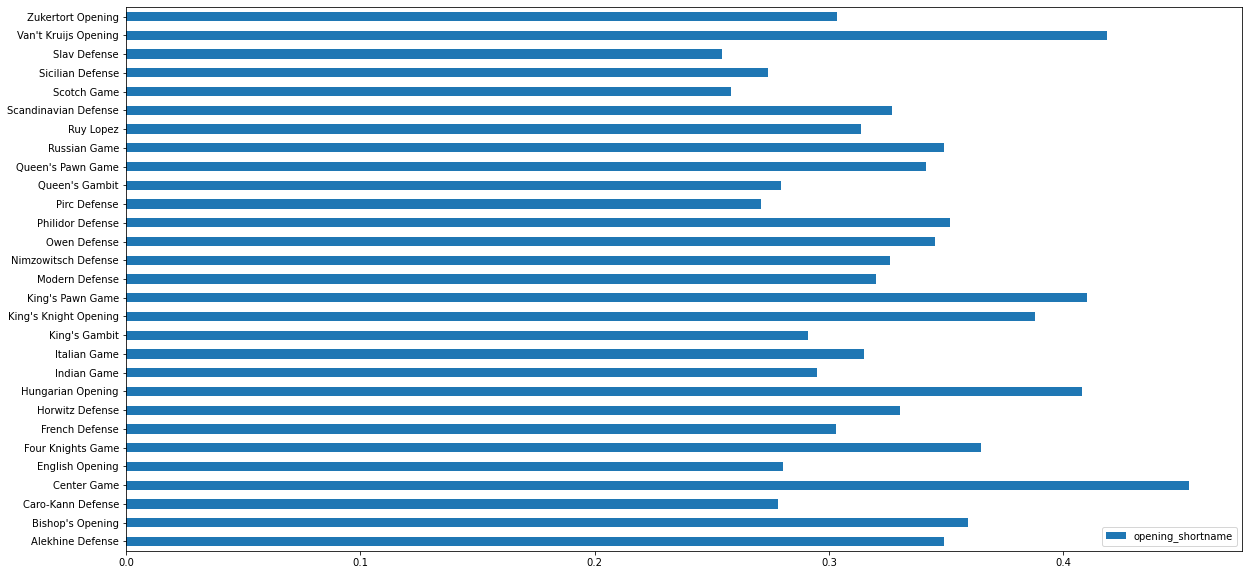

In [62]:
dfwinrateclean=dfwinrate.dropna(axis=0)
dfwinrateclean=dfwinrate.dropna(axis=0)
dfwinrateclean.plot(kind="barh", figsize=(20,10))

In [ ]:
#After calculating the winrate of the top 30 used strategies in the data set, we can see that the "Center Game" strategy 